In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob
sns.set(style="whitegrid", font_scale=1.6)
%matplotlib inline

In [2]:
def read_test_result(fname):
    _d = pd.read_json(fname)
    _d['zone'] = fname[:2]
    return _d

In [3]:
# Read the general DNS stats
d1 = pd.concat([read_test_result(f) for f in glob.glob('*/*-domain-test-results.json')])

In [4]:
d1.head()

,domain,error_type,perc,test,zone
0,3896,Other,0.163258,dns,NZ
1,23510,noaa,0.985164,dns,NZ
2,24974,nosoa,1.046512,dns,NZ
3,2113269,ok,88.554536,dns,NZ
4,102217,refused,4.283307,dns,NZ


In [5]:
d1.sort_values(by='perc', ascending=False)['error_type'].unique()

array(['ok', 'refused', 'timeout', 'nosoa', 'noaa', 'servfail', 'Other'], dtype=object)

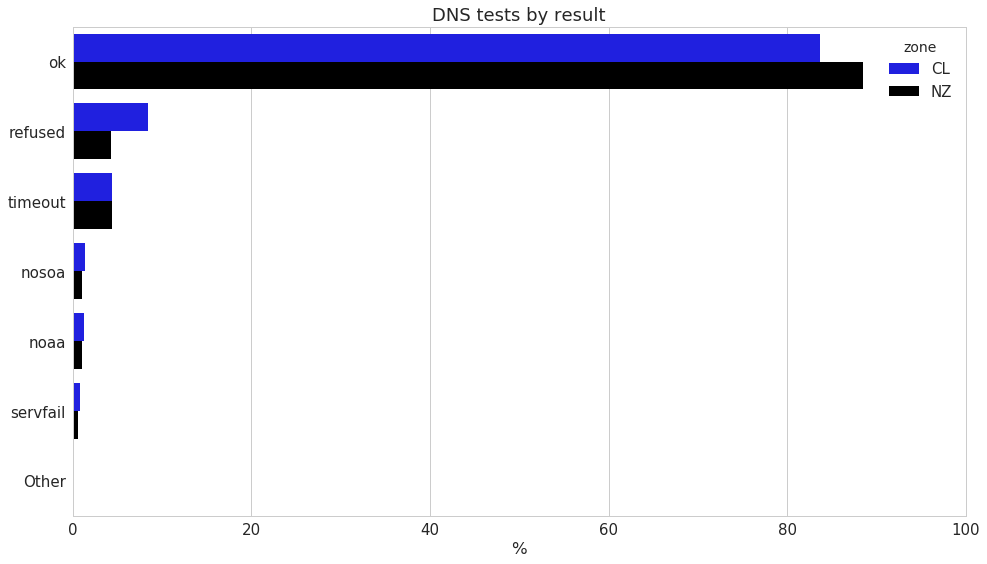

In [6]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.barplot(data=d1, x='perc', y='error_type', hue='zone',
                 order=d1.sort_values(by='perc', ascending=False)['error_type'].unique(),
                 hue_order=['CL', 'NZ'], palette=['blue', 'black'])
ax.set(xlim=[0, 100], title='DNS tests by result', ylabel='', xlabel='%')
plt.savefig('comparison-basic-DNS-test.png')

In [7]:
# Compare DNS vs EDNS results
d2 = pd.concat([read_test_result(f) for f in glob.glob('*/*-DNS-EDNS.json')])

In [8]:
d2

,domain,error_type,perc,test,zone
0,2113269,ok,100.000000,dns,NZ
1,1932308,ok,89.990816,edns,NZ
2,151494,noopt,7.055329,edns,NZ
3,30634,nsid,1.426677,edns,NZ
4,16186,malformed,0.753809,edns,NZ
5,9055,servfail,0.421706,edns,NZ
6,3325,nosoa,0.154851,edns,NZ
7,3324,noaa,0.154804,edns,NZ
8,902,Other,0.042008,edns,NZ
0,982471,ok,100.000000,dns,CL


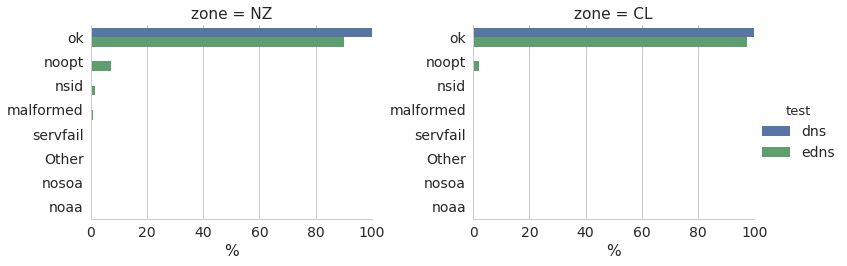

In [9]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.4)
ax = sns.factorplot(data=d2, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d2.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.4)
ax.set(xlim=[0, 100], ylabel='', xlabel='%')
plt.savefig('comparison-DNS-EDNS.png')

In [10]:
# Compare EDNS with EDNS1
d3 = pd.concat([read_test_result(f) for f in glob.glob('*/*-EDNS-EDNS1.json')])

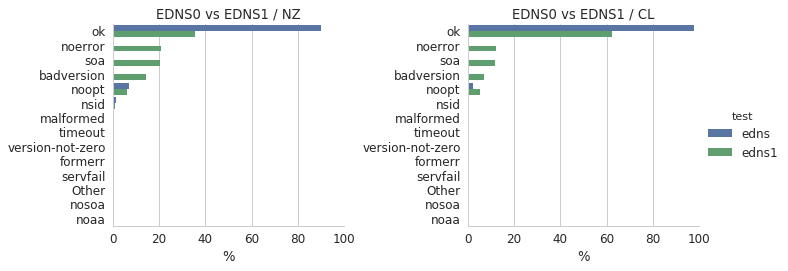

In [11]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d3, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d3.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS0 vs EDNS1 / {col_name}")
plt.savefig('comparison-EDNS-EDNS1.png')

In [12]:
# Compare EDNS0 with EDNS1
d4 = pd.concat([read_test_result(f) for f in glob.glob('*/*-EDNS1-EDNS1OPT.json')])

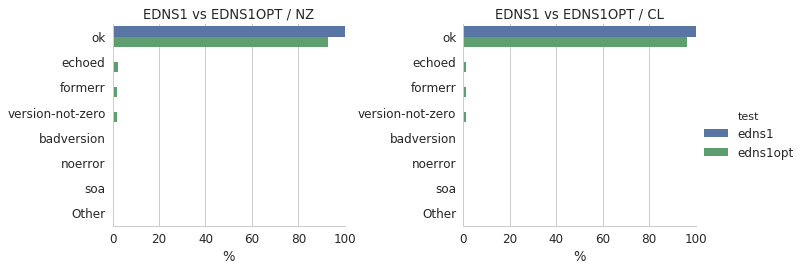

In [13]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d4, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d4.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS1 vs EDNS1OPT / {col_name}")
plt.savefig('comparison-EDNS1-EDNS1OPT.png')

In [14]:
# Compare EDNS vs DO
d5 = pd.concat([read_test_result(f) for f in glob.glob('*/*-DO-EDNS.json')])

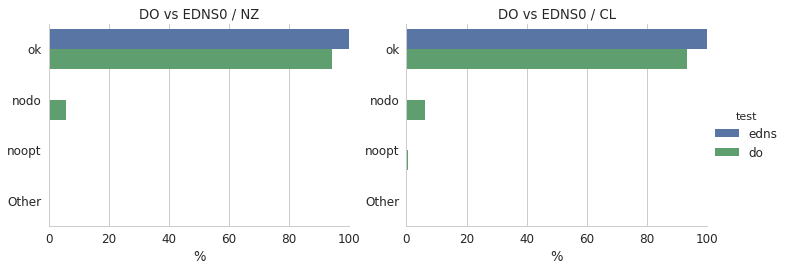

In [15]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d5, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d5.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("DO vs EDNS0 / {col_name}")
plt.savefig('comparison-DO-EDNS.png')

In [16]:
# Compare DO vs EDNSTCP vs EDNS@512
d6 = pd.concat([read_test_result(f) for f in glob.glob('*/*-do-ednstcp-edns512.json')])

In [17]:
d6

,domain,error_type,perc,test,zone
0,1790814,ok,100.000000,do,NZ
1,1777951,ok,99.281668,ednstcp,NZ
2,5847,timeout,0.326499,ednstcp,NZ
3,3840,connection-refused,0.214428,ednstcp,NZ
4,3177,Other,0.177405,ednstcp,NZ
5,1789715,ok,99.938575,edns@512,NZ
6,1100,Other,0.061425,edns@512,NZ
0,895073,ok,100.000000,do,CL
1,888487,ok,99.257984,ednstcp,CL
2,4572,timeout,0.510764,ednstcp,CL


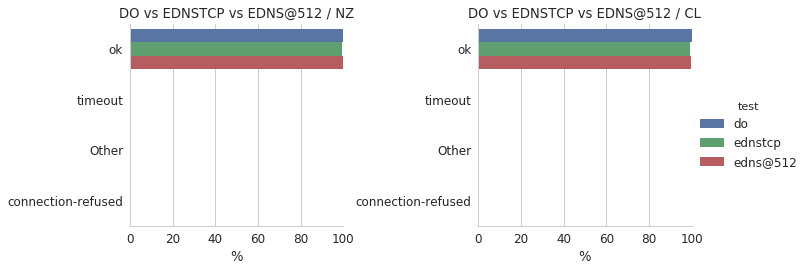

In [18]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d6, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d6.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("DO vs EDNSTCP vs EDNS@512 / {col_name}")
plt.savefig('comparison-DO-EDNSTCP-EDNS512.png')

In [19]:
# Compare EDNS vs EDNSflags
d7 = pd.concat([read_test_result(f) for f in glob.glob('*/*-edns-ednsflags.json')])

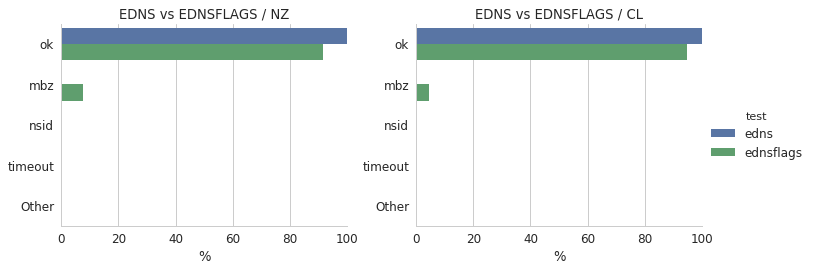

In [20]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d7, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d7.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3)
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs EDNSFLAGS / {col_name}")
plt.savefig('comparison-EDNS-EDNSFLAGS.png')

In [21]:
# Compare EDNS vs EDNSflags
d8 = pd.concat([read_test_result(f) for f in glob.glob('*/*-edns-optlist.json')])

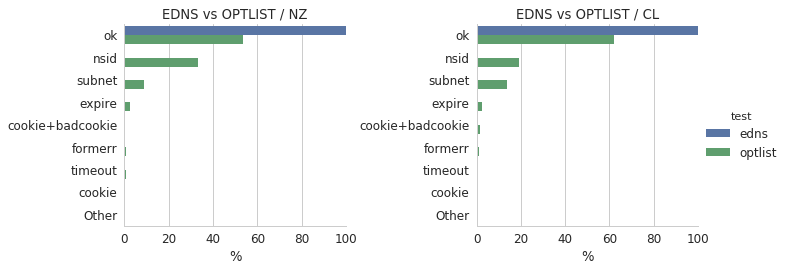

In [22]:
plt.figure(figsize=(16,9))
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.factorplot(data=d8, x='perc', y='error_type', hue='test', col='zone', kind='bar',
                 order=d8.sort_values(by='perc', ascending=False)['error_type'].unique(),
                   aspect=1.3, sharey=False, orient='h')
ax.set(xlim=[0, 100], ylabel='', xlabel='%').set_titles("EDNS vs OPTLIST / {col_name}")
plt.savefig('comparison-EDNS-OPTLIST.png')

In [31]:
# Load the server score histogram to compare
server_score = pd.concat([read_test_result(f) for f in glob.glob('*/*-server-score-histogram.json')])

In [32]:
server_score.head(5)

,bin,fraction,fraction_cum,server_cnt,zone
0,[0.0-0.1),8.120228,8.120228,2680,NZ
1,[0.1-0.2),7.950551,16.070779,2624,NZ
2,[0.2-0.3),0.996849,17.067628,329,NZ
3,[0.3-0.4),2.457278,19.524906,811,NZ
4,[0.4-0.5),2.154284,21.679190,711,NZ


Text(0.5,1,'Server score distribution')

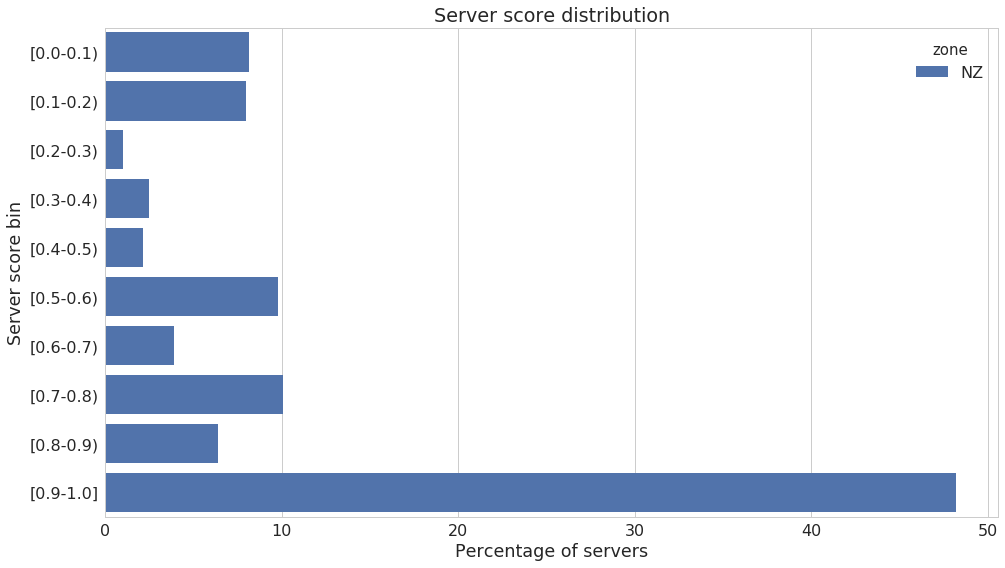

In [35]:
sns.set(style='whitegrid', font_scale=1.6)
plt.figure(figsize=(16,9))

ax = sns.barplot(data=server_score, x='fraction', y='bin', hue='zone', saturation=0.9)
ax.set_xlabel('Percentage of servers')
ax.set_ylabel('Server score bin')
ax.set_title('Server score distribution')